# Yandex Data Science School
## Linear Regression & Regularization Exercise.


## Outline
In this exercise you will learn the following topics:

1. Refresher on how linear regression is solved in batch and in Gradient Descent 
2. Implementation of Ridge Regression
3. Comparing Ridge, Lasso and vanila Linear Regression on a dataset

# Git Exercise
In this exercise you will also experience working with github.

You might need to install local python enviroment.
Installation Instruction for ex2 - working on a local python environment:
https://docs.google.com/document/d/1G0rBo36ff_9JzKy0EkCalK4m_ThNUuJ2bRz463EHK9I

## please add the github link of your work below:


example: https://github.com/username/exercise_name

## Refresher on Ordinary Least Square (OLS) aka Linear Regeression

### Lecture Note

In Matrix notation, the matrix $X$ is of dimensions $n \times p$ where each row is an example and each column is a feature dimension. 

Similarily, $y$ is of dimension $n \times 1$ and $w$ is of dimensions $p \times 1$.

The model is $\hat{y}=X\cdot w$ where we assume for simplicity that $X$'s first columns equals to 1 (one padding), to account for the bias term.

Our objective is to optimize the loss $L$ defines as resiudal sum of squares (RSS): 

$L_{RSS}=\frac{1}{N}\left\Vert Xw-y \right\Vert^2$ (notice that in matrix notation this means summing over all examples, so $L$ is scalar.)

To find the optimal $w$ one needs to derive the loss with respect to $w$.

$\frac{\partial{L_{RSS}}}{\partial{w}}=\frac{2}{N}X^T(Xw-y)$ (to see why, read about [matrix derivatives](http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf) or see class notes )

Thus, the gardient descent solution is $w'=w-\alpha \frac{2}{N}X^T(Xw-y)$.

Solving $\frac{\partial{L_{RSS}}}{\partial{w}}=0$ for $w$ one can also get analytical solution:

$w_{OLS}=(X^TX)^{-1}X^Ty$

The first term, $(X^TX)^{-1}X^T$ is also called the pseudo inverse of $X$.

See [lecture note from Stanford](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details.


## Exercise 1 - Ordinary Least Square
* Get the boston housing dataset by using the scikit-learn package. hint: [load_boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

* What is $p$? what is $n$ in the above notation? hint: [shape](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html)

* write a model `OrdinaryLinearRegression` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score` (which returns the MSE on a given sample set). Hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

* Fit the model. What is the training MSE?

* Plot a scatter plot where on x-axis plot $Y$ and in the y-axis $\hat{Y}_{OLS}$

* Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test? Hint: use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) or [ShuffleSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html).

* Use a t-test to proove that the MSE for training is significantly smaller than for testing. What is the p-value? Hint: use [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html). 

* Write a new class `OrdinaryLinearRegressionGradientDescent` which inherits from `OrdinaryLinearRegression` and solves the problem using gradinet descent. The class should get as a parameter the learning rate and number of iteration. Plot the class convergance. What is the effect of learning rate? How would you find number of iteration automatically? Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your features first.

* The following parameters are optional (not mandatory to use):
    * early_stop - True / False boolean to indicate to stop running when loss stops decaying and False to continue.
    * verbose- True/False boolean to turn on / off logging, e.g. print details like iteration number and loss (https://en.wikipedia.org/wiki/Verbose_mode)
    * track_loss - True / False boolean when to save loss results to present later in learning curve graphs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings


# Ignore all warnings
warnings.filterwarnings("ignore")


# Load the Boston dataset
data, labels = load_boston(return_X_y=True)
# p = data.shape[0]
# n = labels.shape[1]

Average train MSE: 21.41697535438405
Average test MSE: 24.57097637045856


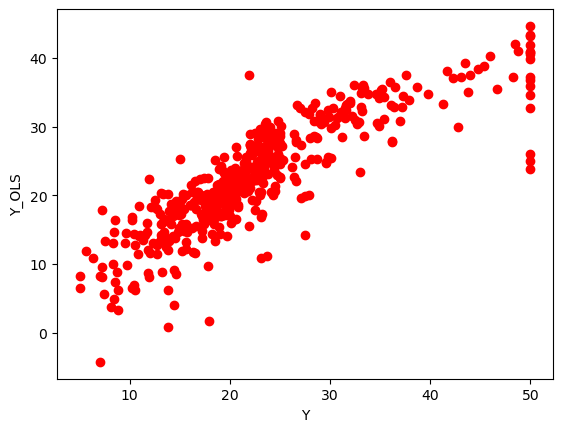

In [2]:
# * write a model `Ols` which has a propoery $w$ and 3 methods: `fit`, `predict` and `score`.? hint: use [numpy.linalg.pinv](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.pinv.html) to be more efficient.

class Ols(object):
  def __init__(self):
    self.w = None
    self.X = None
    
  @staticmethod
  def pad(X):
    return np.insert(X, 0, 1, axis=1)
  
  def fit(self, X, Y):
    #remeber pad with 1 before fitting
    X = self.pad(X)
    self.w = np.linalg.pinv(X.T@X)@X.T@Y
  
  def predict(self, X):
    X = self.pad(X)
    return X@self.w
    
  def score(self, X, Y):
    y_pred = self.predict(X)
    return np.mean((y_pred - Y)**2, axis=0)


  # Plot a scatter plot where on x-axis plot y and in the y-axis Y-ols
model = Ols()
model.fit(data,labels)
y_pred = model.predict(data)

plt.scatter(labels,y_pred,c='red')
plt.xlabel('Y')
plt.ylabel('Y_OLS')


# Split the data to 75% train and 25% test 20 times. What is the average MSE now for train and test?
test_MSE = []
train_MSE = []


for i in range(200):
  X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.25,shuffle=True)
  model.fit(X_train,y_train)
  train_MSE.append(model.score(X_train,y_train))
  test_MSE.append(model.score(X_test,y_test))
  
print('Average train MSE:',np.mean(train_MSE))
print('Average test MSE:',np.mean(test_MSE))

In [3]:
x = np.array([2,4])
X = np.array([[1,2],
              [1,2]])


# v = np.array([1,1])
# y_pred = np.array([[10,11]])
# np.insert(X, 0, 1, axis=1)
# print(X.T- np.mean(X, axis=1))
# print((X.T - np.mean(X, axis=1))/np.std(X,axis=1))


# normalize(x)

mins = np.min(data, axis = 0)
maxs = np.max(data, axis= 0)
print(mins,maxs)
norm = (data - mins)/(maxs - mins)
norm


# means = np.mean(data, axis = 0)
# stds = np.std(data, axis= 0)
# norm = (data - means)/stds
# print(np.isnan(norm).sum())

[6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8700e+02 1.2600e+01 3.2000e-01
 1.7300e+00] [ 88.9762 100.      27.74     1.       0.871    8.78   100.      12.1265
  24.     711.      22.     396.9     37.97  ]


array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [7]:
# # Write a new class OlsGd which solves the problem using gradinet descent. 
# # The class should get as a parameter the learning rate and number of iteration. 
# # Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# # What is the effect of learning rate? 
# # How would you find number of iteration automatically? 
# # Note: Gradient Descent does not work well when features are not scaled evenly (why?!). Be sure to normalize your feature first.
# class Normalizer():
#   def __init__(self):
#     pass

#   def fit(self, X):
#     pass

#   def predict(self, X):
#     #apply normalization
#     pass
    
# class OlsGd(Ols):
  
#   def __init__(self, learning_rate=.05, 
#                num_iteration=1000, 
#                normalize=True,
#                early_stop=True,
#                verbose=True):
    
#     super(OlsGd, self).__init__()
#     self.learning_rate = learning_rate
#     self.num_iteration = num_iteration
#     self.early_stop = early_stop
#     self.normalize = normalize
#     self.normalizer = Normalizer()    
#     self.verbose = verbose
    
#   def _fit(self, X, Y, reset=True, track_loss=True):
#     #remeber to normalize the data before starting
#     pass
        
#   def _predict(self, X):
#     #remeber to normalize the data before starting
#     pass
      
#   def _step(self, X, Y):
#     # use w update for gradient descent
#     pass

In [55]:
# Write a new class OlsGd which solves the problem using gradinet descent. 
# The class should get as a parameter the learning rate and number of iteration. 
# Plot the loss convergance. for each alpha, learning rate plot the MSE with respect to number of iterations.
# What is the effect of learning rate? 
# How would you find number of iteration automatically? 
# Note: Gradient Descent does not work well when features are not scaled evenly (why?!).
# Be sure to normalize your feature first.
class Normalizer():
    def __init__(self):
        self.means = None
        self.stds = None
        pass
    
    # fit data mu and sigma will be used for normalizing
    def fit(self, X):
        self.means = np.mean(X, axis = 0)
        self.stds = np.std(X, axis= 0)
        norm = (X - self.means)/self.stds
        return norm

    def predict(self, X):
        #apply normalization
        norm = (X - self.means)/self.stds
        return norm
    
class OlsGd_our(Ols):
  
    def __init__(self, learning_rate=.05, 
                num_iteration=1000, 
                normalize=True,
                early_stop=True,
                verbose=True):
    
        super(OlsGd_our, self).__init__()
        self.learning_rate = learning_rate
        self.num_iteration = num_iteration
        self.early_stop = early_stop
        self.normalize = normalize
        self.normalizer = Normalizer()    
        self.verbose = verbose
        self.delta = 0.000000001
    
    def fit(self, X, Y, reset=True, track_loss=True):
        #remeber to normalize the data before starting
        if self.normalize:
            X = self.normalizer.fit(X)

        X = self.pad(X)
        self.w = np.zeros(X.shape[1]) 
        self.mse = []
        self.finish = False
        
        for i in range(self.num_iteration): 
            # stopping condition
            if i > 2 and self.early_stop and (self.mse[-2] - self.mse[-1] < self.delta):
                break
            
            self._step(X, Y)
            
            # print iteration number and loss
            if self.verbose and (i+1) % 200 == 0:
                print("Num iteration: "+str(i)+ "MSE score:" + str(self.mse[-1]))
        
        return self
        
    def predict(self, X):
        #remeber to normalize the data before starting
        if self.normalize:
            X = self.normalizer.predict(X)
        
        X = self.pad(X)
        return np.dot(X,self.w)
      
    def _step(self, X, Y, ):
        # use w update for gradient descent
        Y_pred = np.dot(X,self.w)
        mse_score = np.sum(((Y_pred-Y) ** 2)) / (2 * Y.shape[0])
        self.mse.append(mse_score)

        self.w = self.w - (1/Y.shape[0]) * self.learning_rate * (X.T.dot(Y_pred - Y))
            
        return self

In [56]:
our_model = OlsGd_our()
print(our_model.fit(data,labels))


Cost at iteration 200: 11.082878045803083
Cost at iteration 400: 10.977088973446149
Cost at iteration 600: 10.955474753169518
Cost at iteration 800: 10.94966570253954
Cost at iteration 1000: 10.948045835581196

Num iteration: 199MSE score:11.082878045803083
Num iteration: 399MSE score:10.977088973446149
Num iteration: 599MSE score:10.955474753169518
Num iteration: 799MSE score:10.94966570253954
Num iteration: 999MSE score:10.948045835581196


## Exercise 2 - Ridge Linear Regression

Recall that ridge regression is identical to OLS but with a L2 penalty over the weights:

$L(y,\hat{y})=\sum_{i=1}^{i=N}{(y^{(i)}-\hat{y}^{(i)})^2} + \lambda \left\Vert w \right\Vert_2^2$

where $y^{(i)}$ is the **true** value and $\hat{y}^{(i)}$ is the **predicted** value of the $i_{th}$ example, and $N$ is the number of examples

* Show, by differentiating the above loss, that the analytical solution is $w_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$
* Change `OrdinaryLinearRegression` and `OrdinaryLinearRegressionGradientDescent` classes to work also for ridge regression (do not use the random noise analogy but use the analytical derivation). Either add a parameter, or use inheritance.
* **Bonus: Noise as a regularizer**: Show that OLS (ordinary least square), if one adds multiplicative noise to the features the **average** solution for $W$ is equivalent to Ridge regression. In other words, if $X'= X*G$ where $G$ is an uncorrelated noise with variance $\sigma$ and mean 1, then solving for $X'$ with OLS is like solving Ridge for $X$. What is the interpretation? 



In [ ]:
class RidgeLs(Ols):
  def __init__(self, ridge_lambda, *wargs, **kwargs):
    super(RidgeLs,self).__init__(*wargs, **kwargs)
    self.ridge_lambda = ridge_lambda
    
  def _fit(self, X, Y):
    #Closed form of ridge regression
    pass

### Use scikitlearn implementation for OLS, Ridge and Lasso